## Diabetes Predictions

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset=load_diabetes()

In [3]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age',
                                               'sex',
                                               'bmi',
                                               'bp',
                                               's1',
                                               's2',
                                               's3',
                                               's4',
                                               's5',
                                               's6'])

In [6]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
###independent and dependent features
x=df_diabetes
y=dataset['target']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [9]:
##correlation
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


In [10]:
import matplotlib.pyplot as plt

<Axes: >

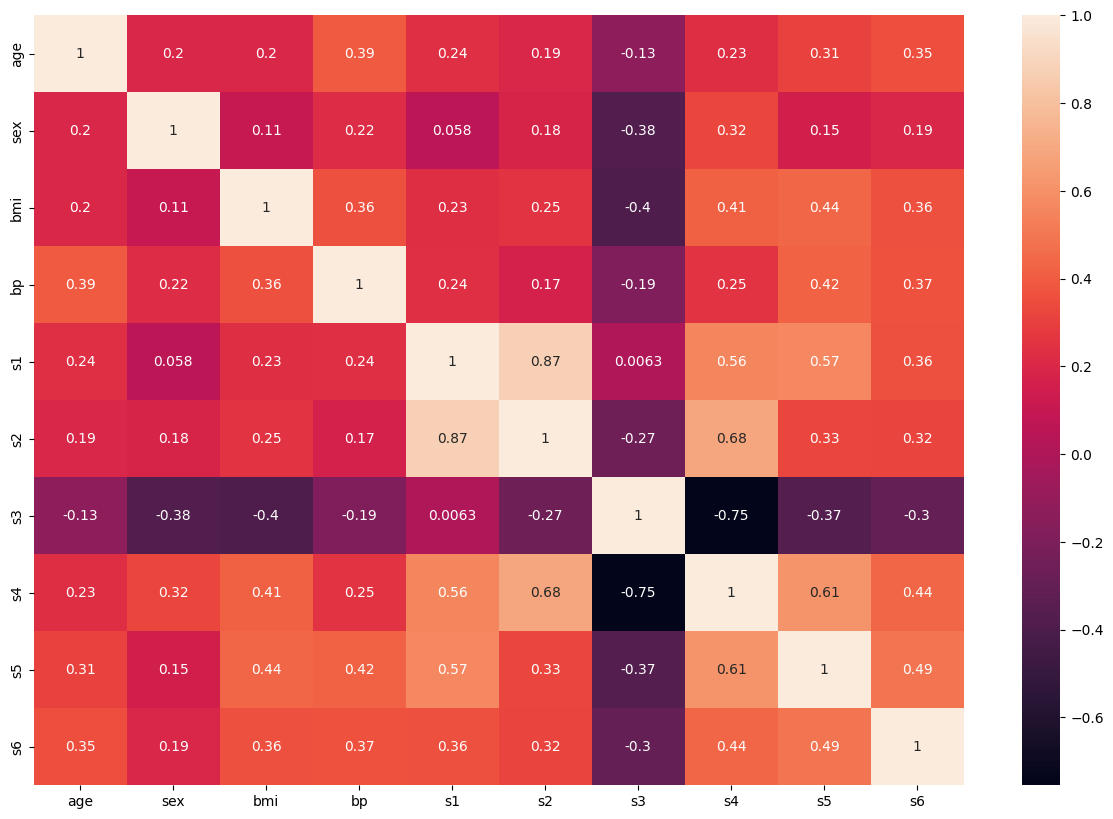

In [11]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

## HYPERPARAMETER TUNING


In [13]:
param={
    'criterion':['mse','friedman_mse','mae'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2'],
}

In [14]:
param

{'criterion': ['mse', 'friedman_mse', 'mae'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
regressor=DecisionTreeRegressor()

In [17]:
grid=GridSearchCV(estimator=regressor,param_grid=param,scoring='neg_mean_squared_error',cv=5)

In [18]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [19]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [20]:
grid.best_score_

np.float64(-4160.491317086724)

In [21]:
y_pred=grid.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [23]:
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

Mean Squared Error: 5295.782487207677
R2 Score: 0.1630755758834378
Mean Absolute Error: 60.27706027684705


In [24]:
select_model=DecisionTreeRegressor(criterion='friedman_mse',
 max_depth=3,
 max_features='log2',
 splitter='best')

In [25]:
select_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='log2')

[Text(0.5, 0.875, 'x[6] <= -0.016\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[4] <= -0.037\nfriedman_mse = 5685.833\nsamples = 138\nvalue = 188.123'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 0.036\nfriedman_mse = 5346.633\nsamples = 26\nvalue = 153.462'),
 Text(0.0625, 0.125, 'friedman_mse = 3578.623\nsamples = 24\nvalue = 140.708'),
 Text(0.1875, 0.125, 'friedman_mse = 1190.25\nsamples = 2\nvalue = 306.5'),
 Text(0.375, 0.375, 'x[8] <= 0.022\nfriedman_mse = 5420.927\nsamples = 112\nvalue = 196.17'),
 Text(0.3125, 0.125, 'friedman_mse = 4960.806\nsamples = 43\nvalue = 159.721'),
 Text(0.4375, 0.125, 'friedman_mse = 4363.813\nsamples = 69\nvalue = 218.884'),
 Text(0.75, 0.625, 'x[2] <= 0.017\nfriedman_mse = 3989.295\nsamples = 171\nvalue = 124.181'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[9] <= 0.051\nfriedman_mse = 2648.071\nsamples = 133\nvalue = 108.669'),
 Text(0.5625, 0.125, 'friedman_mse = 2385.287\nsamples = 

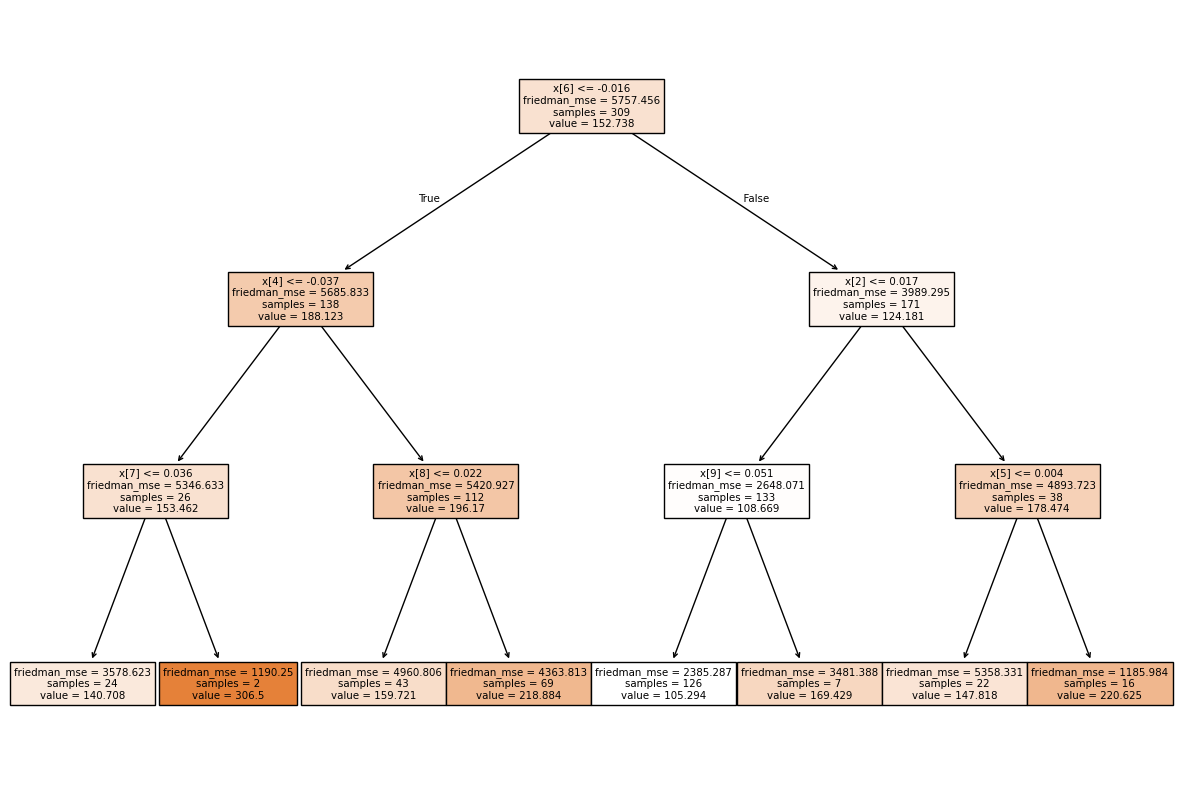

In [26]:
##visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(select_model,filled=True)